<a href="https://colab.research.google.com/github/appersaravanan/Semeter-2-Assignment-1/blob/master/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Model,Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Input,Flatten,Dense,GaussianNoise,Activation,AveragePooling2D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split,KFold
import matplotlib.pyplot as plt
from math import ceil, floor
import random
from random import randrange
from keras.callbacks import EarlyStopping

1. (Down)load and preprocess MNIST (Links to an external site.) (Review steps in Assignment 1). Display example images (suggesting 16).

2. Implement LeNet-5 with Keras functional API (Links to an external site.). Output/Print your implemented model structure by function "summary (Links to an external site.)".

    {good references: LeNet Structure (Links to an external site.), Example Implementation (Links to an external site.)}

    (Notes: do NOT copy paste codes from the references because they are using Sequential while we try to write LeNet-5 with functional API)

3. Train your implemented LeNet-5 model with MNIST. Plot the training results (epochs v.s. loss values on both the training and validation sets). Determine your stopping epoch based on the traning results.

    (Notes: (optional) refer to "train_on_batch" and "test_on_batch" methods (Links to an external site.) if you would like to use our implemented "batch generator in assignment 1") 

4. Conduct similar experiments as discussed in Page 17, Lecture 4-1 with this implemented LeNet model. (i.e., add noise to each layer, observe the performance). Plot a similarly formatted figure as in the lecture slide.

5. Conduct similar experiments as discussed in Page 18, Lecture 4-1 with this implemented LeNet model. (i.e., training one layer at a time (leaving all other layers as random parametrized), observe the performance). Plot a similarly formatted figure as in the lecture slide.

In [62]:
def show_imgs(images):
    fig, axs = plt.subplots(4, 4)
    cnt = 0
    for i in range(4):
        for j in range(4):
            axs[i,j].imshow(images[cnt])
            axs[i,j].axis('off')
            cnt += 1
    plt.show()

# Step 1.  Load MNIST dataset
1. (Down)load and preprocess MNIST (Links to an external site.) (Review steps in Assignment 1). Display example images (suggesting 16).

In [63]:

(x_train,y_train),(x_test,y_test) =mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#Samples Before Normalization 

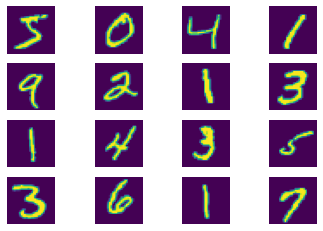

In [64]:
show_imgs(x_train)

# Normalization and one hot encodings


In [65]:

print(x_train.min() , x_train.max())
x_train = x_train- x_train.min() / x_train.max()- x_train.min()
x_train =x_train/255

print(x_train.min() , x_train.max())
x_test = x_test- x_test.min() / x_test.max()- x_test.min()
x_test =x_test/255
print(x_test.min() , x_test.max())
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)



0 255
0.0 1.0
0.0 1.0


#2. Implement LeNet-5 with Keras functional API (Links to an external site.). Output/Print your implemented model structure by function "summary (Links to an external site.)".

In [67]:
input=Input(shape=[28, 28,1])
x=Conv2D(filters = 6,kernel_size = 5, strides = 1,activation = 'tanh',)(input)

x=MaxPool2D(pool_size = 2, strides = 2)(x)
x=Conv2D(filters = 16, kernel_size = 5,strides = 1,activation = 'tanh')(x)

x=MaxPool2D(pool_size = 2, strides = 2)(x)
x=Flatten()(x)
x=Dense(units = 120, activation = 'tanh')(x)
x=Dense(units = 84, activation = 'tanh')(x)
x=Dense(units = 10, activation = 'softmax')(x)

model=Model(inputs=input,outputs=x)
model.summary()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy',])


Model: "model_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 120)               308

# 3.Train your implemented LeNet-5 model with MNIST. Plot the training results (epochs v.s. loss values on both the training and validation sets). Determine your stopping epoch based on the traning results.

In [68]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
data=model.fit(x_train,y_train,epochs=100,steps_per_epoch=10,validation_split=0.3,callbacks=[es],shuffle=True)

Epoch 1/100
10/10 [==============================] - 2s 182ms/step - loss: 2.2114 - accuracy: 0.2695 - val_loss: 1.6370 - val_accuracy: 0.6217
Epoch 2/100
10/10 [==============================] - 1s 159ms/step - loss: 1.4563 - accuracy: 0.6510 - val_loss: 0.9550 - val_accuracy: 0.7669
Epoch 3/100
10/10 [==============================] - 1s 156ms/step - loss: 0.8751 - accuracy: 0.7725 - val_loss: 0.6147 - val_accuracy: 0.8315
Epoch 4/100
10/10 [==============================] - 1s 159ms/step - loss: 0.5920 - accuracy: 0.8357 - val_loss: 0.4609 - val_accuracy: 0.8729
Epoch 5/100
10/10 [==============================] - 1s 162ms/step - loss: 0.4524 - accuracy: 0.8757 - val_loss: 0.3704 - val_accuracy: 0.8953
Epoch 6/100
10/10 [==============================] - 1s 155ms/step - loss: 0.3678 - accuracy: 0.9000 - val_loss: 0.3121 - val_accuracy: 0.9106
Epoch 7/100
10/10 [==============================] - 1s 159ms/step - loss: 0.3066 - accuracy: 0.9141 - val_loss: 0.2717 - val_accuracy: 0.9232

In [59]:
score = model.evaluate(x_test, y_test);
print('score Loss- ', score[0])
print('score accuracy -', score[1])



313/313 [==============================] - 1s 2ms/step - loss: 0.0672 - accuracy: 0.9781
score Loss-  0.06723818928003311
score accuracy - 0.9781000018119812


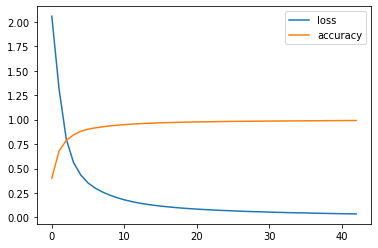

In [69]:
from matplotlib import pyplot
pyplot.plot(data.history['loss'] ,label='loss')
pyplot.plot(data.history['accuracy'] ,label='accuracy')
pyplot.legend()
pyplot.show()

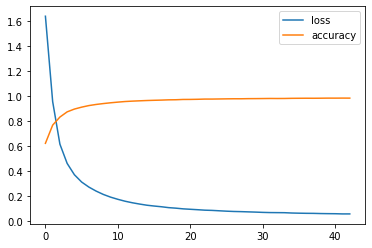

In [70]:
from matplotlib import pyplot
pyplot.plot(data.history['val_loss'] ,label='loss')
pyplot.plot(data.history['val_accuracy'] ,label='accuracy')
pyplot.legend()
pyplot.show()

In [60]:
input=Input(shape=[28, 28,1])
x=Conv2D(filters = 6,kernel_size = 5, strides = 1)(input)
x=Activation ('tanh')(x)
x=MaxPool2D(pool_size = 2, strides = 2)(x)
x=Conv2D(filters = 16, kernel_size = 5,strides = 1)(x)
x=Activation ('tanh')(x)
x=MaxPool2D(pool_size = 2, strides = 2)(x)
x=Flatten()(x)
x=Dense(units = 120, activation = 'tanh')(x)
x=Dense(units = 84, activation = 'tanh')(x)
x=Dense(units = 10, activation = 'softmax')(x)

model=Model(inputs=input,outputs=x)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy',])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
model.summary()
# data=model.fit(x_train,y_train,epochs=20,steps_per_epoch=10,validation_split=0.3,callbacks=[es],shuffle=True)

Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
activation_16 (Activation)   (None, 24, 24, 6)         0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
activation_17 (Activation)   (None, 8, 8, 16)          0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 4, 4, 16)          0  

In [7]:
score=model.evaluate(x_test,y_test)
print(score[0])
print(score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0801 - accuracy: 0.9763
0.08008863776922226
0.9763000011444092


In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
activation (Activation)      (None, 24, 24, 6)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
activation_1 (Activation)    (None, 8, 8, 16)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0     

In [35]:
 from keras.callbacks import Callback

class MyCustomCallback(tf.keras.callbacks.Callback):
  def on_epoch_begin(self, batch, logs=None):
    # print(self.model.layers[self.index].stddev)
    self.model.layers[self.index].stddev = self.stdval;
    if self.stdval<10:
     self.stdval +=.5
    print(self.model.layers[self.index])
    print(self.stdval)



In [37]:
history_arr=list();
x_axis=[]
noise_index=[1,3,7,11,14,17]
noise_index=[0,1]
x
noise=0
for index in range(len(noise_index)):
  for model_index in range(len(model.layers)):
    
    if model_index==0:
      x= model.layers[model_index].output
      if noise_index[index]==0:
        x = GaussianNoise(noise)(x,training=True)
    elif noise_index[index]==model_index:
      x = model.layers[model_index](x)
      x = GaussianNoise(noise)(x,training=True)
     
    else :
      x = model.layers[model_index](x)
  new_model=Model(model.input,x)
  new_model.summary()
  new_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy',])
  
  callback=MyCustomCallback()
  callback.stdval=noise
  callback.index=noise_index[index]

  
  #model.fit(x_train,y_train,epochs=500,steps_per_epoch=20,validation_split=0.3,callbacks=[es,accuracy])
  # history=new_model.fit(x_train,y_train,epochs=20,steps_per_epoch=10,validation_split=0.3,callbacks=[callback],shuffle=True)
  # history_arr.append(history.history)

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
gaussian_noise_8 (GaussianNo (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 256)               0  

In [10]:
history_arr=list();
x_axis=[]
noise_index=[1,3,7,11,14,17]
noise_index=[0,1,4,7,8,9]
x
noise=0
for index in range(len(noise_index)):
  for model_index in range(len(model.layers)):
    
    if model_index==0:
      x= model.layers[model_index].output
      if noise_index[index]==0:
        x = GaussianNoise(noise)(x,training=True)
    elif noise_index[index]==model_index:
      x = model.layers[model_index](x)
      x = GaussianNoise(noise)(x,training=True)
     
    else :
      x = model.layers[model_index](x)
  new_model=Model(model.input,x)
  # new_model.summary()
  new_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy',])
  
  callback=MyCustomCallback()
  callback.stdval=noise
  callback.index=noise_index[index]

  
  #model.fit(x_train,y_train,epochs=500,steps_per_epoch=20,validation_split=0.3,callbacks=[es,accuracy])
  history=new_model.fit(x_train,y_train,epochs=20,steps_per_epoch=10,validation_split=0.3,callbacks=[callback],shuffle=True)
  history_arr.append(history.history)

Epoch 1/20
0.5
10/10 [==============================] - 2s 175ms/step - loss: 0.0784 - accuracy: 0.9775 - val_loss: 0.0914 - val_accuracy: 0.9731
Epoch 2/20
1.0
10/10 [==============================] - 1s 156ms/step - loss: 0.0724 - accuracy: 0.9788 - val_loss: 0.0853 - val_accuracy: 0.9750
Epoch 3/20
1.5
10/10 [==============================] - 1s 157ms/step - loss: 0.0665 - accuracy: 0.9804 - val_loss: 0.0819 - val_accuracy: 0.9758
Epoch 4/20
2.0
10/10 [==============================] - 1s 160ms/step - loss: 0.0624 - accuracy: 0.9812 - val_loss: 0.0778 - val_accuracy: 0.9771
Epoch 5/20
2.5
10/10 [==============================] - 1s 162ms/step - loss: 0.0572 - accuracy: 0.9831 - val_loss: 0.0748 - val_accuracy: 0.9776
Epoch 6/20
3.0
10/10 [==============================] - 1s 156ms/step - loss: 0.0516 - accuracy: 0.9845 - val_loss: 0.0745 - val_accuracy: 0.9777
Epoch 7/20
3.5
10/10 [==============================] - 1s 157ms/step - loss: 0.0527 - accuracy: 0.9849 - val_loss: 0.0708 -

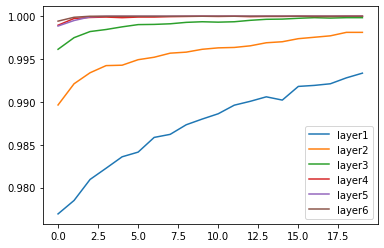

In [11]:
from matplotlib import pyplot

pyplot.plot(history_arr[0]['accuracy'] ,label='layer1')
pyplot.plot(history_arr[1]['accuracy'] ,label='layer2')
pyplot.plot(history_arr[2]['accuracy'] ,label='layer3')

pyplot.plot(history_arr[3]['accuracy'],label='layer4')
pyplot.plot(history_arr[4]['accuracy'],label='layer5')
pyplot.plot(history_arr[5]['accuracy'],label='layer6')

pyplot.legend()
pyplot.show()

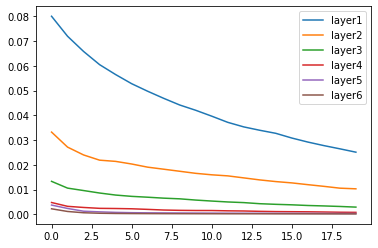

In [12]:
from matplotlib import pyplot

pyplot.plot(history_arr[0]['loss'] ,label='layer1')
pyplot.plot(history_arr[1]['loss'] ,label='layer2')
pyplot.plot(history_arr[2]['loss'] ,label='layer3')

pyplot.plot(history_arr[3]['loss'],label='layer4')
pyplot.plot(history_arr[4]['loss'],label='layer5')
pyplot.plot(history_arr[5]['loss'],label='layer6')

pyplot.legend()
pyplot.show()

In [22]:

input=Input(shape=[28, 28,1])
x=Conv2D(filters = 6,kernel_size = 5, strides = 1, activation='relu')(input)

x=MaxPool2D(pool_size = 2, strides = 2)(x)
x=Conv2D(filters = 16, kernel_size = 5,strides = 1, activation='relu')(x)
x=Activation ('tanh')(x)
x=MaxPool2D(pool_size = 2, strides = 2)(x)
x=Flatten()(x)
x=Dense(units = 120, activation = 'tanh',padding='valid')(x)
x=Dense(units = 84, activation = 'tanh')(x)
x=Dense(units = 10, activation = 'softmax')(x)

model=Model(inputs=input,outputs=x)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy',])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
training_index=1
history_tranining_arr=list()
for l in model.layers:
    print(l.name, l.trainable)
    l.trainable=False
layer_index=[1,4,7]
# for index in range(len(model.layers)):
for index in range(len(layer_index)):
   if layer_index[index]==training_index or index ==0:
     model.layers[index].training=True
     print(model.layers[index])
   
   history=model.fit(x_train,y_train,epochs=50,steps_per_epoch=10,validation_split=0.3,shuffle=True)
   history_tranining_arr.append(history.history)
   training_index+=1
   print('================================================================================================================================')

   
    


input_7 True
conv2d_12 True
activation_12 True
average_pooling2d_2 True
conv2d_13 True
activation_13 True
average_pooling2d_3 True
flatten_6 True
dense_15 True
dense_16 True
dense_17 True
Epoch 1/50
10/10 [==============================] - 2s 182ms/step - loss: 2.3085 - accuracy: 0.1222 - val_loss: 2.2854 - val_accuracy: 0.1828
Epoch 2/50
10/10 [==============================] - 1s 160ms/step - loss: 2.2754 - accuracy: 0.2022 - val_loss: 2.2515 - val_accuracy: 0.2362
Epoch 3/50
10/10 [==============================] - 2s 164ms/step - loss: 2.2420 - accuracy: 0.2585 - val_loss: 2.2164 - val_accuracy: 0.3060
Epoch 4/50
10/10 [==============================] - 1s 160ms/step - loss: 2.2057 - accuracy: 0.3294 - val_loss: 2.1784 - val_accuracy: 0.3744
Epoch 5/50
10/10 [==============================] - 2s 165ms/step - loss: 2.1680 - accuracy: 0.3898 - val_loss: 2.1363 - val_accuracy: 0.4318
Epoch 6/50
10/10 [==============================] - 1s 161ms/step - loss: 2.1246 - accuracy: 0.4409 - 

KeyboardInterrupt: ignored

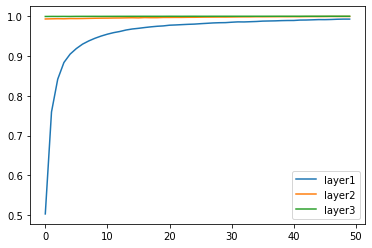

In [20]:
from matplotlib import pyplot

pyplot.plot(history_tranining_arr[0]['accuracy'] ,label='layer1')
pyplot.plot(history_tranining_arr[1]['accuracy'] ,label='layer2')
pyplot.plot(history_tranining_arr[2]['accuracy'] ,label='layer3')

# pyplot.plot(history_tranining_arr[3]['accuracy'],label='layer4')
# pyplot.plot(history_tranining_arr[4]['accuracy'],label='layer5')
# pyplot.plot(history_tranining_arr[5]['accuracy'],label='layer6')

pyplot.legend()
pyplot.show()

#Sample after normalization

In [ ]:
history_arr=list();
x_axis=[]
noise_index=[1,3,7,11,14,17]
# noise_index=[3]
for index in range(len(noise_index)):
   for model_indx in model.
  input=Input(shape=[28, 28,1],name="input")
 
  x=GaussianNoise(0.0)(input,training=True)
  x=Conv2D(filters = 6,kernel_size = 5, strides = 1)(x)
  x=GaussianNoise(0.0)(x)
  x=Activation ('tanh')(x)
  x=MaxPool2D(pool_size = 2, strides = 2)(x)
  x=Conv2D(filters = 16, kernel_size = 5,strides = 1)(x)
  x=GaussianNoise(0.0)(x)
  x=Activation ('tanh')(x)
  x=MaxPool2D(pool_size = 2, strides = 2)(x)
  x=Flatten()(x)
  x=GaussianNoise(0.0)(x)
  x=Activation ('tanh')(x)
  x=Dense(units = 120)(x)
  x=GaussianNoise(0.0)(x)
  x=Activation ('tanh')(x)
  x=Dense(units = 84)(x)
  x=GaussianNoise(0.0)(x)
  x=Activation ('tanh')(x)
  x=Dense(units = 10, activation = 'softmax',name="output")(x)
  model=Model(inputs=input,outputs=x)
  model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy',])
  
  callback=MyCustomCallback()
  callback.stdval=10
  callback.stdval_arr=list()
  x_axis=callback.stdval_arr
  callback.index=noise_index[index]
  
  # model.summary()
  #model.fit(x_train,y_train,epochs=500,steps_per_epoch=20,validation_split=0.3,callbacks=[es,accuracy])
  history=model.fit(x_train,y_train,epochs=20,steps_per_epoch=10,validation_split=0.3,callbacks=[callback],shuffle=True)
  history_arr.append(history.history)
 


In [ ]:
history_arr[0]['accuracy'].reverse()
history_arr[1]['accuracy'].reverse()
history_arr[2]['accuracy'].reverse()
history_arr[3]['accuracy'].reverse()

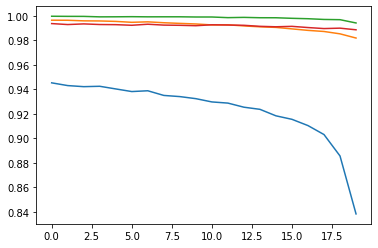

In [ ]:
len(history_arr)
from matplotlib import pyplot

pyplot.plot(history_arr[0]['accuracy'] ,label='layer1')
pyplot.plot(history_arr[1]['accuracy'] ,label='layer2')
pyplot.plot(history_arr[2]['accuracy'] ,label='layer3')

pyplot.plot(history_arr[3]['accuracy'],label='layer4')


pyplot.show()

In [ ]:
score=model.evaluate(x_test,y_test)
print(score[0])
print(score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.2530 - accuracy: 0.9335
0.2530122697353363
0.9334999918937683


[7 2 1 0 4 1 4 9 5 9]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


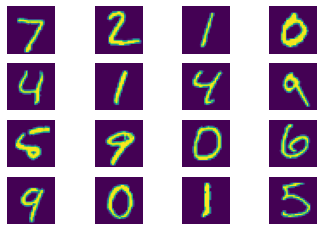

In [ ]:

y_prob = model.predict(x_test) 
y_classes = y_prob.argmax(axis=-1)
print(y_classes[0:10])
print(y_test[0:10])
show_imgs(x_test)

In [ ]:
from keras import backend as K

# with a Sequential model
# get_3rd_layer_output = K.function([model.layers[0].input],
#                                   [model.layers[3].output])
# intermediate_layer_model = Model(inputs=model.input,
#                                  outputs=model.layers[3].output)
# layer_output = get_3rd_layer_output(x_test)
# print (len(layer_output[0]))


inp = model.inputs     
print(inp)                                     # input placeholder
outputs = [layer.output for layer in model.layers] 
print(outputs) 
outputs = outputs[1:len(outputs)]
print(outputs)             # all layer outputs
# functon_ref = K.function([inp, K.learning_phase()], outputs )   # evaluation function
# print(x_test[0])

for index in range(len(model.layers)):
    if index!=0 and index!= len(model.layers)-1:
      print(model.layers[index])
      graph_data=list()
      keras_function = K.function(inp, model.layers[index].output)
      graph_data.append(keras_function(x_test))

# # Testing

# layer_outs = functon_ref([x_test,y_test])
print (graph_data)

[<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_2')>]
[<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_2')>, <KerasTensor: shape=(None, 24, 24, 6) dtype=float32 (created by layer 'conv2d_2')>, <KerasTensor: shape=(None, 12, 12, 6) dtype=float32 (created by layer 'max_pooling2d_2')>, <KerasTensor: shape=(None, 8, 8, 16) dtype=float32 (created by layer 'conv2d_3')>, <KerasTensor: shape=(None, 4, 4, 16) dtype=float32 (created by layer 'max_pooling2d_3')>, <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'flatten_1')>, <KerasTensor: shape=(None, 120) dtype=float32 (created by layer 'dense_3')>, <KerasTensor: shape=(None, 84) dtype=float32 (created by layer 'dense_4')>, <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_5')>]
[<KerasTensor: shape=(None, 24, 24, 6) dtype=float32 (created by layer 'conv2d_2')>, <KerasTensor: shape=(None, 12, 12, 6) dtype=float32 (created by layer 'max_pooling2d_2')>, 

In [ ]:
print (graph_data[0][0])

[-0.9316943   0.20610967 -0.45342124 -0.9467562  -0.95432335  0.48817027
  0.09012762  0.9768614   0.7952711  -0.6552277  -0.9064483  -0.992313
  0.5989962   0.44939676  0.97834563 -0.59999317 -0.87658376 -0.98315245
  0.98654354 -0.7761889   0.9494131   0.48618013 -0.66216314  0.99049354
  0.90235025 -0.84440655 -0.7531065  -0.9875638  -0.9030933   0.16492833
  0.8842617   0.4859775   0.96954465  0.66860694 -0.6173712   0.53340304
 -0.9195059   0.76877445 -0.9680128  -0.853767    0.9926054   0.21618702
  0.9635493   0.8219777  -0.9161036   0.9657261  -0.66276807  0.84497505
 -0.5492282   0.8838866   0.9964512   0.05401968 -0.871138    0.7565204
  0.80460393  0.91081226  0.9112052  -0.5897526  -0.98948985  0.9114602
  0.90808475 -0.47336164 -0.94495195 -0.9424644  -0.8101473  -0.7901715
 -0.93262315  0.7502926  -0.99044436 -0.18987992  0.7189448   0.03135075
  0.74349153 -0.76603866  0.48609427 -0.4482109  -0.992756    0.07579167
 -0.8614752  -0.85272664  0.9098982  -0.44441757 -0.8201

ValueError: ignored

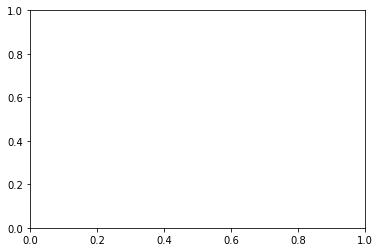

In [ ]:

# importing the required module 
import matplotlib.pyplot as plt 
  
# x axis values 
# [0][]]
# corresponding y axis values 
y = [-0.5,0,0.5,1] 
  
# plotting the points  
plt.plot(graph_data[0][0], y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('My first graph!') 
  
# function to show the plot 
plt.show()

In [ ]:
input=Input(shape=[28, 28,1])
x=Conv2D(filters = 6,kernel_size = 5, strides = 1)(input)
x=GaussianNoise(0.2)(x)
x=Activation ('tanh')(x)
x=MaxPool2D(pool_size = 2, strides = 2)(x)
x=Conv2D(filters = 16, kernel_size = 5,strides = 1)(x)
x=GaussianNoise(0.1)(x)
x=Activation ('tanh')(x)
x=MaxPool2D(pool_size = 2, strides = 2)(x)
x=Flatten()(x)
x=Dense(units = 120, activation = 'tanh')(x)
x=Dense(units = 84, activation = 'tanh')(x)
x=Dense(units = 10, activation = 'softmax')(x)
model=Model(inputs=input,outputs=x)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy',])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
accuracy = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1)
#model.fit(x_train,y_train,epochs=500,steps_per_epoch=20,validation_split=0.3,callbacks=[es,accuracy])
history=model.fit(x_train,y_train,epochs=100,steps_per_epoch=10,validation_split=0.3,callbacks=[es],shuffle=True)

Epoch 1/100
10/10 [==============================] - 2s 168ms/step - loss: 2.1986 - accuracy: 0.2419 - val_loss: 1.6900 - val_accuracy: 0.5978
Epoch 2/100
10/10 [==============================] - 1s 137ms/step - loss: 1.5153 - accuracy: 0.6142 - val_loss: 1.0673 - val_accuracy: 0.7400
Epoch 3/100
10/10 [==============================] - 1s 129ms/step - loss: 0.9149 - accuracy: 0.7626 - val_loss: 0.6967 - val_accuracy: 0.8153
Epoch 4/100
10/10 [==============================] - 1s 125ms/step - loss: 0.6123 - accuracy: 0.8308 - val_loss: 0.5229 - val_accuracy: 0.8579
Epoch 5/100
10/10 [==============================] - 1s 139ms/step - loss: 0.4753 - accuracy: 0.8661 - val_loss: 0.4114 - val_accuracy: 0.8876
Epoch 6/100
10/10 [==============================] - 1s 130ms/step - loss: 0.3952 - accuracy: 0.8873 - val_loss: 0.3488 - val_accuracy: 0.9032
Epoch 7/100
10/10 [==============================] - 1s 129ms/step - loss: 0.3422 - accuracy: 0.9043 - val_loss: 0.2999 - val_accuracy: 0.9166

In [ ]:
https://towardsdatascience.com/building-custom-callbacks-with-keras-and-tensorflow-2-85e1b79915a3
history.history

{'accuracy': [0.34816667437553406,
  0.6581428647041321,
  0.7791666388511658,
  0.8395000100135803,
  0.8718571662902832,
  0.8926190733909607,
  0.9054047465324402,
  0.9175238013267517,
  0.9269047379493713,
  0.9335476160049438,
  0.9400237798690796,
  0.9455000162124634,
  0.9513809680938721,
  0.9554523825645447,
  0.9573809504508972,
  0.9611904621124268,
  0.9625238180160522,
  0.9649761915206909,
  0.9664047360420227,
  0.9690238237380981,
  0.9704523682594299,
  0.9715476036071777,
  0.9730476140975952,
  0.9736190438270569,
  0.9753571152687073,
  0.9760952591896057,
  0.9772142767906189,
  0.9776190519332886],
 'loss': [2.0620906352996826,
  1.3733271360397339,
  0.8349345922470093,
  0.5748593807220459,
  0.4543232023715973,
  0.3785904049873352,
  0.32996615767478943,
  0.28916603326797485,
  0.2568672299385071,
  0.2298174798488617,
  0.2073209583759308,
  0.1879194676876068,
  0.1706516593694687,
  0.1567431390285492,
  0.14583835005760193,
  0.1336805373430252,
  0.127

# Step 2. Regardless of the 10,000 built-in testing image, write functions to divide the built-in 50,000 training images to your own training and validation sets implementing three major methods {a. hold-out; b. K-fold; c. bootstrap} discussed in lecture 3. Print the sizes of your implemented datasets.

# 1.Hold-out defination
Below function split dataset into two parts  as train dataset and validation dataset based on train_ds_size and vald_ds_size

In [ ]:
def hold_out(ds,labels, train_ds_size,vald_ds_size):
  if ds is None:
      raise ValueError("ds can't be empty")
  # print(len(ds))
 
  if isinstance(train_ds_size, float) and isinstance(vald_ds_size, float) and (train_ds_size+vald_ds_size>1.0) :
    raise ValueError("Split size is greater the dataset size")
  train_count=ceil(train_ds_size* len(ds))

  valid_count=ceil(vald_ds_size* len(ds))
  
  return ds[:train_count],ds[train_count:(train_count+valid_count)],labels[:train_count],labels[train_count:(train_count+valid_count)]

#Hold-out outputs
70% for training dataset and 30% for validation dataset

In [ ]:
x_train_split, x_vald_split,y_train_split,y_vald_split= hold_out(x_train,y_train,0.7,0.3)

print(x_train_split.shape)
print(y_train_split.shape)
print(x_vald_split.shape)
print(y_vald_split.shape)

(35000, 32, 32, 3)
(35000, 1)
(15000, 32, 32, 3)
(15000, 1)


# 2. K-fold defination 
Below function splits dataset and label dataset into given("no_of_folds") number of groups and Each group contains 500 images  as we divided 
50000/100 = 500 "Groups"


In [ ]:
def k_fold_split(no_of_folds):
    folds_ds_list,folds_label_list= list(), list();
    fold_counts= int(len(x_train)  // no_of_folds)
    fold_sizes = np.full(no_of_folds, fold_counts , dtype=np.int)
    fold_sizes[:fold_counts%no_of_folds]  +=1
    start_index,stop_index,fold_end_index= 0,0,0
    
    for fold_index in fold_sizes:
      start_index,stop_index =fold_end_index,fold_end_index+fold_index
      folds_ds_list.append(x_train[start_index:stop_index])
      folds_label_list.append(y_train[start_index:stop_index]) 
      fold_end_index=stop_index
    return folds_ds_list,folds_label_list;



Invoke the above function which creates 100 groups of dataset and label

In [ ]:
folds_ds_list,folds_label_list = k_fold_split(100)

##Below method apply k-fold logic to get "99" groups for training set and "1" group for validation set .
* Yield statement is used to control the flow of the generator function 
* next funtion is used to verify the output the function. 


In [ ]:

def apply_data_validation_set_from_folds():
    start_index,stop_index,fold_end_index= -1,0,0
    for i in range(len(folds_ds_list)):
      print( " Training data -> fold [0:"+str(start_index+1)+ "] and [" + str(start_index+2)+ ":" + str(len(folds_ds_list)) + 
            "] Validation dataset fold ->" +str(start_index+1))
      train,valid= folds_ds_list[0:start_index+1] +folds_ds_list[start_index+2: len(folds_ds_list)] ,[folds_ds_list[start_index+1]]
      yield train,valid 
      start_index +=1
      
apply_fold=apply_data_validation_set_from_folds()  
count=0
while True:
  try:
      train_fold,validation_fold,=next(apply_fold)
      # print( str(count)+ " train dataset"+ str(len(train_fold)) +" validation_fold :"+ str(len(validation_fold)) )
      count+=1;
  except StopIteration:
     break



 Training data -> fold [0:0] and [1:100] Validation dataset fold ->0
 Training data -> fold [0:1] and [2:100] Validation dataset fold ->1
 Training data -> fold [0:2] and [3:100] Validation dataset fold ->2
 Training data -> fold [0:3] and [4:100] Validation dataset fold ->3
 Training data -> fold [0:4] and [5:100] Validation dataset fold ->4
 Training data -> fold [0:5] and [6:100] Validation dataset fold ->5
 Training data -> fold [0:6] and [7:100] Validation dataset fold ->6
 Training data -> fold [0:7] and [8:100] Validation dataset fold ->7
 Training data -> fold [0:8] and [9:100] Validation dataset fold ->8
 Training data -> fold [0:9] and [10:100] Validation dataset fold ->9
 Training data -> fold [0:10] and [11:100] Validation dataset fold ->10
 Training data -> fold [0:11] and [12:100] Validation dataset fold ->11
 Training data -> fold [0:12] and [13:100] Validation dataset fold ->12
 Training data -> fold [0:13] and [14:100] Validation dataset fold ->13
 Training data -> fol

# 3. Bootstrap resampling

sample :1 shape(1000, 32, 32, 3)


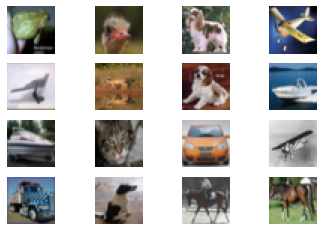

sample :2 shape(1000, 32, 32, 3)


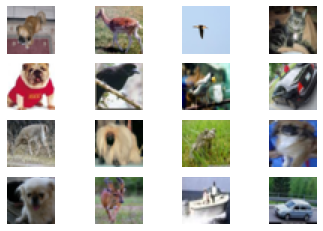

sample :3 shape(1000, 32, 32, 3)


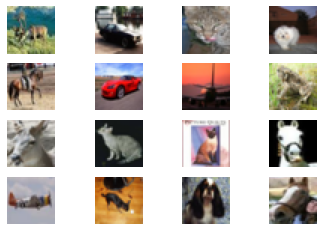

sample :4 shape(1000, 32, 32, 3)


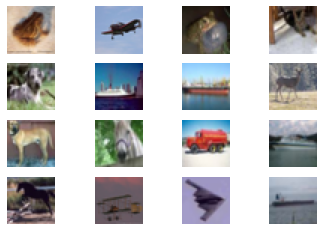

sample :5 shape(1000, 32, 32, 3)


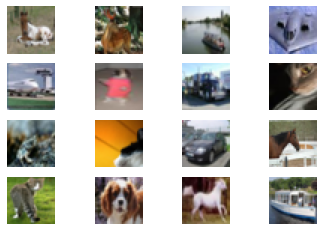

In [ ]:
def bootstrap_sampling(withdraw_count):
    sample_indices= (np.random.rand(withdraw_count )*len(x_train)).astype(int);
    return x_train[sample_indices]
    

for i in range(5):
    bootstrap_samples=bootstrap_sampling(1000)
    print("sample :"+str(i+1)+ " shape" + str(bootstrap_samples.shape))
    show_imgs(bootstrap_samples)

#K-fold cross validations(Additional implementation)
Below function create K-folds(50 parts) from the dataset and each parts contains 1000 images 

In [ ]:
def k_fold_cross_validation(ds,labels_train,fold_count):
    ds_fold=ceil(len(ds)/fold_count)
    fold_list=list();
    label_fold_list=list()
    for i in range(fold_count):
      fold_entires=list();
      fold_list.append(fold_entires)
      label_fold=list();
      label_fold_list.append(label_fold)
      
      while len(fold_entires) < ds_fold:     
        index = randrange(len(ds))
        label_fold.append(labels_train.pop(index))
        fold_entires.append(ds.pop(index))
      
    return fold_list,label_fold_list;

image_list,label_list=k_fold_cross_validation(list(x_train),list(y_train),50)





#Cross-validation
Below block creates validation dataset from each fold(parts). it picks specified number of images from each fold(part) and build the validation set. Here we specified to pick 30 images from each parts and totally we will have 1500 images as validation data set

In [ ]:
validation_ds_fold_list=list()
validation_label_fold_list=list()

def create_validation_from_k_fold(validation_count_from_each_fold=3):
   for i in image_list:
   
     validation_count_from_each_fold_index=0    
    #  print(i)
     while validation_count_from_each_fold_index < validation_count_from_each_fold:
       index = randrange(len(i))
       validation_ds_fold_list.append(i.pop(index))
      #  validation_label_fold_list.append(label_list[i].pop(index))
       validation_count_from_each_fold_index+=1
create_validation_from_k_fold(30);

In [ ]:
print(len(validation_ds_fold_list))



1500
970


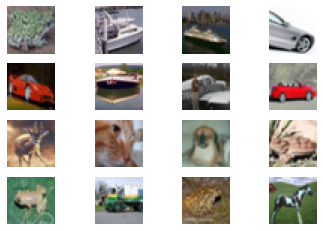

In [ ]:
show_imgs(validation_ds_fold_list)

#Step 3. Implement a function that will produce a batch of given size everytime we call it. (Read Python Yield (Links to an external site.) for Python generator)

In [ ]:
batch_size=128
print(len(x_train))
print(len(x_train)/batch_size)
print(len(x_train)%batch_size)
def get_batch_data(batch_size=64):
   if len(x_train)<batch_size:
     raise ValueError("Batch size should be smaller than x_train size")
   batch_count=int(len(x_train)/batch_size)
   batch_rest=int(len(x_train)%batch_size)
   startindex=0;
   cur_batch_index=0;
   for i in range(batch_count):
      cur_batch_index=i
      batch_end=startindex+batch_size
      x_batch= x_train[startindex:batch_end]
      y_batch=y_train[startindex:batch_end]
      yield x_batch,y_batch
      startindex=batch_end
      #print(cur_batch_index,batch_count-1)
   if batch_rest>0 and cur_batch_index== batch_count-1:
     
      batch_end=batch_end+batch_rest
      x_batch= x_train[startindex:batch_end]
      y_batch=y_train[startindex:batch_end]
      yield x_batch,y_batch;
  
   
gen=get_batch_data(128)   ;





50000
390.625
80


In [ ]:
count=1
while True:
  try:
        x_batch_2,y_batch_2=next(gen)
        print( str(count)+ " Validation dataset"+ str(x_batch_2.shape) +" Label :"+ str(y_batch_2.shape) )
        count+=1
  except StopIteration:
     break
  

1 Validation dataset(128, 32, 32, 3) Label :(128, 1)
2 Validation dataset(128, 32, 32, 3) Label :(128, 1)
3 Validation dataset(128, 32, 32, 3) Label :(128, 1)
4 Validation dataset(128, 32, 32, 3) Label :(128, 1)
5 Validation dataset(128, 32, 32, 3) Label :(128, 1)
6 Validation dataset(128, 32, 32, 3) Label :(128, 1)
7 Validation dataset(128, 32, 32, 3) Label :(128, 1)
8 Validation dataset(128, 32, 32, 3) Label :(128, 1)
9 Validation dataset(128, 32, 32, 3) Label :(128, 1)
10 Validation dataset(128, 32, 32, 3) Label :(128, 1)
11 Validation dataset(128, 32, 32, 3) Label :(128, 1)
12 Validation dataset(128, 32, 32, 3) Label :(128, 1)
13 Validation dataset(128, 32, 32, 3) Label :(128, 1)
14 Validation dataset(128, 32, 32, 3) Label :(128, 1)
15 Validation dataset(128, 32, 32, 3) Label :(128, 1)
16 Validation dataset(128, 32, 32, 3) Label :(128, 1)
17 Validation dataset(128, 32, 32, 3) Label :(128, 1)
18 Validation dataset(128, 32, 32, 3) Label :(128, 1)
19 Validation dataset(128, 32, 32, 3)